In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('datasets/titanic.csv')
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
data.drop(columns=['Name'], inplace=True)
data.head(2)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()
scaler = StandardScaler()

data['Sex'] = encoder.fit_transform(data['Sex'])
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

data.head(2)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,-0.529366,1,0,-0.503586
1,1,1,0,0.604265,1,0,0.783412


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

inp = data.drop(columns=['Pclass'])
targets = data['Pclass']

xTrain, xTest, yTrain, yTest = train_test_split(inp, targets, random_state=0, test_size=0.25)

nb = GaussianNB()

nb.fit(xTrain, yTrain)

GaussianNB()

In [15]:
yPred = nb.predict(xTest)
yProb = nb.predict_proba(xTest)


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

print(accuracy_score(yTest, yPred))
print(precision_score(yTest, yPred, average='weighted'))
print(recall_score(yTest, yPred, average='weighted'))
print(f1_score(yTest, yPred, average='weighted'))

0.6756756756756757
0.7546480167169822
0.6756756756756757
0.6989703806657299


In [22]:
cm = confusion_matrix(yTest, yPred)
print(cm)

[[ 26  20   4]
 [  1  16  18]
 [  2  27 108]]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           1       0.90      0.52      0.66        50
           2       0.25      0.46      0.33        35
           3       0.83      0.79      0.81       137

    accuracy                           0.68       222
   macro avg       0.66      0.59      0.60       222
weighted avg       0.75      0.68      0.70       222



<Axes: >

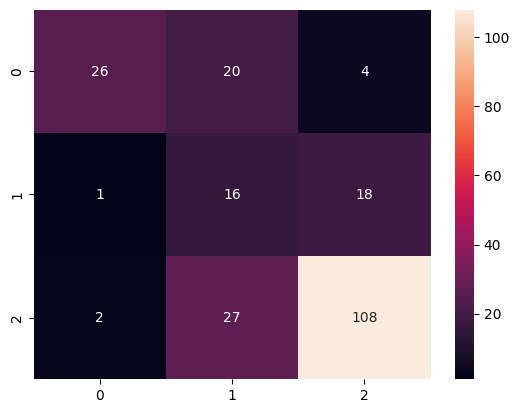

In [30]:
sns.heatmap(cm, annot=True, fmt='g')